# Wrangling Grocery and Gourmet Food Data

## Imports

In [1]:
import json
import gzip
import unittest
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import os.path
from dotenv import load_dotenv
import logging

## Environment Variables

In [2]:
load_dotenv()
data_in = os.getenv('IN_DATA_FILEPATH') + os.getenv('RAW_META_FILE')
price_logs = os.getenv('PRICES_LOG')
# This path is still in the markdown below because haven't found a working way to use a variable there.
doc_filepath = os.getenv('DOCUMENTATION_FILEPATH')
data_out = os.getenv('OUT_DATA_FILEPATH') + os.getenv('CLEANED_META_FILE')

## Introduction
Data Wrangling is the process of collecting, organizing, and determining how well-defined the data is.  
See [Grocery Recommender - Capstone Two](../Grocery_Recommender_-_Capstone_Two.pdf) for details about this project. 


## Load Data 
This public dataset is available online <sup>[1]</sup> and is not included in source/version control for space reasons.  
After downloading the dataset add it to the file location in your .env file; see environments_example.txt.

In [3]:
##Load the data
data = []
with gzip.open(data_in) as f:
    for l in f:
        data.append(json.loads(l.strip()))

In [4]:
# Confirm data loaded by checking total number of products.
print(len(data))

287051


In [5]:
# View raw data.
print(data[0])

{'category': ['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda'], 'tech1': '', 'description': ['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.'], 'fit': '', 'title': 'Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs', 'also_buy': [], 'image': [], 'tech2': '', 'brand': 'Ariola Imports', 'feature': [], 'rank': '165,181 in Grocery & Gourmet Food (', 'also_view': ['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY'], 'main_cat': 'Grocery', 'similar_item': '', 'date': '', 'price': '$41.91', 'asin': '0681727810'}


In [6]:
# Will use a pandas dataframe to explore and analyse data.
grocery_data = pd.DataFrame.from_dict(data)
grocery_data.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",,"[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],[],,Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","[B0000D9MYM, B0000D9MYL, B00ADHIGBA, B00H9OX59...",Grocery,,,$41.91,0681727810,NaN
1,"[Grocery & Gourmet Food, Cooking & Baking, Sug...",,"[Shipped from UK, please allow 10 to 21 busine...",,Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",[https://images-na.ssl-images-amazon.com/image...,,,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,,,,0853347867,NaN
2,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,[Jazz up your cakes with a sparkling monogram ...,,Letter C - Swarovski Crystal Monogram Wedding ...,[],[],,Unik Occasions,[],"[>#669,941 in Kitchen & Dining (See Top 100 in...",[B07DXN65TF],Amazon Home,,"September 21, 2010",$29.95,1888861118,NaN
3,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[Large Letter - Height 4.75""]",,Letter H - Swarovski Crystal Monogram Wedding ...,[],[],,Other,"[Large Letter - Height 4.75""]","[>#832,581 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$11.45,1888861517,NaN
4,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[4.75""]",,Letter S - Swarovski Crystal Monogram Wedding ...,[],[],,Unik Occasions,"[4.75"" height]","[>#590,999 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$15.00,1888861614,NaN


In [7]:
# Overview of the data shows it already is pretty well defined.
# Only the details column is missing (NaN) some values.
grocery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287051 entries, 0 to 287050
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      287051 non-null  object
 1   tech1         287051 non-null  object
 2   description   287051 non-null  object
 3   fit           287051 non-null  object
 4   title         287051 non-null  object
 5   also_buy      287051 non-null  object
 6   image         287051 non-null  object
 7   tech2         287051 non-null  object
 8   brand         287051 non-null  object
 9   feature       287051 non-null  object
 10  rank          287051 non-null  object
 11  also_view     287051 non-null  object
 12  main_cat      287051 non-null  object
 13  similar_item  287051 non-null  object
 14  date          287051 non-null  object
 15  price         287051 non-null  object
 16  asin          287051 non-null  object
 17  details       287027 non-null  object
dtypes: object(18)
memory usa

In [8]:
# Another way to see which features are missing values. 
# This is easier to read if there's a lot of columns and similar number counts.
grocery_data.isnull().any()

category        False
tech1           False
description     False
fit             False
title           False
also_buy        False
image           False
tech2           False
brand           False
feature         False
rank            False
also_view       False
main_cat        False
similar_item    False
date            False
price           False
asin            False
details          True
dtype: bool

In [9]:
# The number of features for each item/row vary (17-18).
grocery_data.count(1)

0         17
1         17
2         17
3         17
4         17
          ..
287046    18
287047    18
287048    18
287049    18
287050    18
Length: 287051, dtype: int64

### Observations
- Think useful features will probably be title, also_buy, rank, also_view, similar_item, and date.
- many special characters in multiple columns.
- 'date' is full month dd, yyyy.
- 'price' has $ appended.
- Probably want to replace index with 'asin'.
- From the numbers above it looks the various counts between columns, rows, and non-null values are consistent. However, looking at a small sample of the data it appears like more than just one value is null for several of the rows.

## Explore Data
### Find Data of Interest and Clean It - Attempt 1

In [10]:
# Interested in gluten free data because of diet restrictions.
# Find all products whose title includes gluten free using 'standard' lists and loops.
gluten_free_list = []
for d in data:
    if 'title' in d and 'gluten free' in d['title'].lower():
        gluten_free_list.append(d)

print(len(gluten_free_list))

5537


In [11]:
# Example product titles.
for d in gluten_free_list[:10]:
    print(d['title'])

Sans Sucre Mousse Mix Gluten Free, Strawberry
Sans Sucre Chocolate Mousse Mix - Gluten Free
Sans Sucre Cheesecake Mousse Mix - Gluten Free
Sans Sucre Lemon Mousse Mix - Gluten Free
Ajika Royal Basmati Pilaf Instant Meal, Side Dish, Gluten Free, No Salt or Msg
Natures Plus Source of Life Energy Shake - Granola Flavor - 2.2 lbs Multivitamin, Mineral &amp; Protein Powder - Whole Food Meal Replacement - Non GMO, Vegetarian, Gluten Free - 26 Servings
Borsari All Natural Seasoned Salt, Citrus Blend, Gluten Free, No MSG, 4 Ounce Shaker Bottle
Natures Plus Spirutein Shake - Nutty Berry Burst Flavor - 2.4 lbs, Spirulina Protein Powder - Plant Based Meal Replacement, Vitamins &amp; Minerals for Energy - Vegetarian, Gluten Free - 30 Servings
Nando's Medium PERi-PERi Sauce - Gluten Free | Non GMO | 4.7 Oz (2 Pack)
Amish Country Popcorn - Medium Yellow Popcorn - Old Fashioned, Non GMO, and Gluten Free - with Recipe Guide and 1 Year Freshness Warranty (2 Pound Burlap)


In [12]:
# The Pandas way of doing the above is less lines of code
gluten_free_dataframe = grocery_data[grocery_data['title'].str.lower().str.contains('gluten free')]
gluten_free_dataframe.count()

category        5537
tech1           5537
description     5537
fit             5537
title           5537
also_buy        5537
image           5537
tech2           5537
brand           5537
feature         5537
rank            5537
also_view       5537
main_cat        5537
similar_item    5537
date            5537
price           5537
asin            5537
details         5537
dtype: int64

In [13]:
gluten_free_dataframe.title.iloc[:10]

1180        Sans Sucre Mousse Mix Gluten Free, Strawberry
1184        Sans Sucre Chocolate Mousse Mix - Gluten Free
1185       Sans Sucre Cheesecake Mousse Mix - Gluten Free
1187            Sans Sucre Lemon Mousse Mix - Gluten Free
1543    Ajika Royal Basmati Pilaf Instant Meal, Side D...
1702    Natures Plus Source of Life Energy Shake - Gra...
1704    Borsari All Natural Seasoned Salt, Citrus Blen...
1717    Natures Plus Spirutein Shake - Nutty Berry Bur...
1755    Nando's Medium PERi-PERi Sauce - Gluten Free |...
1954    Amish Country Popcorn - Medium Yellow Popcorn ...
Name: title, dtype: object

In [14]:
# Finding specific brand I enjoy.
# Even though this is gluten free it doesn't show up in the gluten free dataframe because 'gluten free' isn't in the title.
brazi_bites = grocery_data[grocery_data['brand'].str.lower().str.contains('brazi bites')].T
brazi_bites

,255470,266702
category,"[Grocery & Gourmet Food, Frozen, Bread & Dough]","[Grocery & Gourmet Food, Snack Foods, Crackers]"
tech1,,
description,"[These are 100 percent USDA Certified organic,...","[Brazi Bites Original Brazilian Cheese Bread, ..."
fit,,
title,"Brazi Bites, Brazilian Cheese Bread, Original,...","Brazi Bites Original Brazilian Cheese Bread, 1..."
also_buy,"[B00FE9LC0O, B0047IG6OU, B000RULSYK, B078HRLNL...",[]
image,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
tech2,,
brand,Brazi Bites,Brazi Bites
feature,[],[]


### Observations
- Probably want to replace index with 'asin'.
- So far haven't found any values in 'tech1', 'fit', 'tech2', or 'similar_item'.

Even though there are missing values in the data I'm interested there isn't appear to be enough data to justify only analyzing gluten fee items.
Therefore, shouldn't need to worry about dropping columns just based off the information I'm interested in. Instead, will worry about dropping based off of no data.

In [15]:
missing = pd.concat([grocery_data.isnull().sum(), 100 * grocery_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'], ascending=False)

,count,%
details,24,0.008361
tech1,0,0.000000
asin,0,0.000000
price,0,0.000000
date,0,0.000000
similar_item,0,0.000000
main_cat,0,0.000000
also_view,0,0.000000
rank,0,0.000000
category,0,0.000000


This check also shows that hardly any data is missing. This is desired; however, it doesn't seem to be correct.

### Find Data of Interest and Clean It - Attempt 2

In [16]:
# Researching on a smaller data set to see what is happening.

tech1_has_blanks = gluten_free_dataframe[gluten_free_dataframe['tech1'] == ''].index
print('tech1 should have a length:', tech1_has_blanks)

asin_no_blanks = gluten_free_dataframe[gluten_free_dataframe['asin'] == ''].index
print('asin should not have anything:', asin_no_blanks)


tech1 should have a length: Int64Index([  1180,   1184,   1185,   1187,   1543,   1702,   1704,   1717,
              1755,   1954,
            ...
            286670, 286675, 286709, 286740, 286771, 286845, 286947, 286981,
            287001, 287009],
           dtype='int64', length=5534)
asin should not have anything: Int64Index([], dtype='int64')


In [17]:
# One way to solve the problem.

example_fix = gluten_free_dataframe.replace('', np.nan)
example_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5537 entries, 1180 to 287009
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      5537 non-null   object 
 1   tech1         3 non-null      object 
 2   description   5537 non-null   object 
 3   fit           0 non-null      float64
 4   title         5537 non-null   object 
 5   also_buy      5537 non-null   object 
 6   image         5537 non-null   object 
 7   tech2         0 non-null      float64
 8   brand         5379 non-null   object 
 9   feature       5537 non-null   object 
 10  rank          5537 non-null   object 
 11  also_view     5537 non-null   object 
 12  main_cat      5531 non-null   object 
 13  similar_item  4 non-null      object 
 14  date          13 non-null     object 
 15  price         2652 non-null   object 
 16  asin          5537 non-null   object 
 17  details       5537 non-null   object 
dtypes: float64(2), object(1

This only fixed the issues with single cells. Blank lists are still an issue.

In [18]:
# Thought 'asin' values were unique; however, they aren't.
grocery_data['asin'].value_counts().head(3700)

B0001BVF7U    2
B0000VZXX8    2
B0000TZHZ4    2
B0001RIS2E    2
B0001M0ZWU    2
             ..
B0001M12P4    2
B0001M0Z1Q    2
B015JR45KE    1
B009KW7L6A    1
B0161RWQF2    1
Name: asin, Length: 3700, dtype: int64

In [19]:
# Spot checked some and it looks like these are just duplicates in the data of the same thing; only the index is different..
# Also, percentage wise the majority of the 'asin' number are unique so should be ok to use as id.
grocery_data[grocery_data['asin'] == 'B0001M0YTO']

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details
2480,"[Grocery & Gourmet Food, Herbs, Spices & Seaso...",,[Seasoning Pizza. It is a high quality healthy...,,Frontier Natural Products Pizza Seasoning -- 1...,"[B0001M10ZG, B001VNKT0Q, B001VNGKAO, B00GCDPLC...",[],,Frontier,[],"56,442 in Grocery & Gourmet Food (","[B0001M10ZG, B076THTQ1K, B00DUF3CHU, B000WR2GN...",Grocery,,,$14.99,B0001M0YTO,{' Product Dimensions: ': '4 x 4 x 10...
6177,"[Grocery & Gourmet Food, Herbs, Spices & Seaso...",,[Seasoning Pizza. It is a high quality healthy...,,Frontier Natural Products Pizza Seasoning -- 1...,"[B0001M10ZG, B001VNKT0Q, B001VNGKAO, B00GCDPLC...",[],,Frontier,[],"56,442 in Grocery & Gourmet Food (","[B0001M10ZG, B076THTQ1K, B00DUF3CHU, B000WR2GN...",Grocery,,,$14.99,B0001M0YTO,{' Product Dimensions: ': '4 x 4 x 10...


In [20]:
# # Most common brands.
grocery_data['brand'].value_counts()

                            11419
Unknown                      1780
Black Tie Mercantile         1458
Trader Joe's                 1234
McCormick                    1041
                            ...  
Plaza Mayor                     1
Diet Mountain Dew               1
Iflavor                         1
NOW&LATER STRAWBERRY 6PC        1
DAS                             1
Name: brand, Length: 38904, dtype: int64

Research: Why do the counts appear off?  
- Is it because of whitespace? Don't think so because of the strip method when loading data. Also, selecting the cell area inside the dataframe doesn't highlight anything in these cells. However, it does select the text in non-empty cells.
- There are definitely more missing/blank values than what the initial information revealed.

Answers:  
- Blank values.
- Certain cells have the full HTML DOM (so long it doesn't display in Pandas and looks empty).
- Some prices contain a range of values.

### Find Data of Interest and Clean It - Attempt 3
Ran into problems analyzing the data because didn't fully understand the info summary above.
Copying dataframe to convert types and then analyze further. <sup>[2]</sup>

In [21]:
grocery_data_copy = grocery_data.copy()

grocery_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287051 entries, 0 to 287050
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      287051 non-null  object
 1   tech1         287051 non-null  object
 2   description   287051 non-null  object
 3   fit           287051 non-null  object
 4   title         287051 non-null  object
 5   also_buy      287051 non-null  object
 6   image         287051 non-null  object
 7   tech2         287051 non-null  object
 8   brand         287051 non-null  object
 9   feature       287051 non-null  object
 10  rank          287051 non-null  object
 11  also_view     287051 non-null  object
 12  main_cat      287051 non-null  object
 13  similar_item  287051 non-null  object
 14  date          287051 non-null  object
 15  price         287051 non-null  object
 16  asin          287051 non-null  object
 17  details       287027 non-null  object
dtypes: object(18)
memory usa

In [22]:
# Clean blank values
grocery_data_copy.replace('', np.nan, inplace=True)
grocery_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287051 entries, 0 to 287050
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   category      287051 non-null  object 
 1   tech1         744 non-null     object 
 2   description   287051 non-null  object 
 3   fit           4 non-null       object 
 4   title         287048 non-null  object 
 5   also_buy      287051 non-null  object 
 6   image         287051 non-null  object 
 7   tech2         0 non-null       float64
 8   brand         275632 non-null  object 
 9   feature       287051 non-null  object 
 10  rank          287051 non-null  object 
 11  also_view     287051 non-null  object 
 12  main_cat      285688 non-null  object 
 13  similar_item  256 non-null     object 
 14  date          9662 non-null    object 
 15  price         133858 non-null  object 
 16  asin          287051 non-null  object 
 17  details       287027 non-null  object 
dtypes: f

In [23]:
# Wrangle prices
def convert_currency(val: str) -> float:
    """
    Converts input to string and output to Decimal (an accurate float for currency).
     - Remove $ and commas.
     - Change number ranges into np.NaN.
     - Change other problem characters to np.NaN.
     - All values must already be in the same currency.
     # Note: This has many additional checks and concepts added in different ways for learning purposes.
    """
    new_val = str(val)
    
    # Setup Logging
    logging.basicConfig(filename=price_logs, filemode='w+', level=logging.INFO)
    
    # Changing problem values such as HTML and blanks to np.NaN as soon as possible.
    # Research: Need to find better way to handle performance for these checks. 
    # See cleaned data going forward below.
    if new_val == '':
        return np.NaN
    if ('/' in new_val) | ('{' in new_val) | ('}' in new_val) | ('<' in new_val) | ('>' in new_val):
        logging.info(f"Converting problem character(s) to np.NaN. Original: {new_val}")
        return np.NaN
    # Could write this to a report for a customer or BA to determine if we want to use min, max, or mean instead.
    if ' - ' in new_val:
        logging.warning(f"Converting range of numbers to np.NaN. Original: {new_val}")
        return np.NaN
        
    # If other common problem characters are found in the data they should be removed here.
    # The exception is other currency symbols because that will remove key meaning from the data.
    new_val = new_val.replace(',','').replace('$', '')
    
    # Return the desired output or throw an error.
    try:
        new_val = round(float(new_val), 2)
        return new_val
    except ValueError:
        # This is a type of issue the user can fix on a case by case basis.
        logging.warning(f"""
            WARNING: The new value cannot be converted. Only numbers and '.' are allowed in the data.
            - If there are values in multiple currencies the data must be converted into just $ first.
            - Most likely this problem is because of unexpected character(s) at: {val}.  
        """)
        raise ValueError

In [24]:
grocery_data_copy['price'] = grocery_data_copy['price'].apply(convert_currency)
grocery_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287051 entries, 0 to 287050
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   category      287051 non-null  object 
 1   tech1         744 non-null     object 
 2   description   287051 non-null  object 
 3   fit           4 non-null       object 
 4   title         287048 non-null  object 
 5   also_buy      287051 non-null  object 
 6   image         287051 non-null  object 
 7   tech2         0 non-null       float64
 8   brand         275632 non-null  object 
 9   feature       287051 non-null  object 
 10  rank          287051 non-null  object 
 11  also_view     287051 non-null  object 
 12  main_cat      285688 non-null  object 
 13  similar_item  256 non-null     object 
 14  date          9662 non-null    object 
 15  price         132036 non-null  float64
 16  asin          287051 non-null  object 
 17  details       287027 non-null  object 
dtypes: f

In [25]:
# Reformat date
grocery_data_copy['date'] = pd.to_datetime((grocery_data_copy['date']), errors='coerce')
grocery_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287051 entries, 0 to 287050
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   category      287051 non-null  object        
 1   tech1         744 non-null     object        
 2   description   287051 non-null  object        
 3   fit           4 non-null       object        
 4   title         287048 non-null  object        
 5   also_buy      287051 non-null  object        
 6   image         287051 non-null  object        
 7   tech2         0 non-null       float64       
 8   brand         275632 non-null  object        
 9   feature       287051 non-null  object        
 10  rank          287051 non-null  object        
 11  also_view     287051 non-null  object        
 12  main_cat      285688 non-null  object        
 13  similar_item  256 non-null     object        
 14  date          9555 non-null    datetime64[ns]
 15  price         132

In [26]:
grocery_data_copy['price'].describe()

count    132036.000000
mean         25.414546
std          38.099857
min           0.010000
25%          10.880000
50%          17.980000
75%          29.990000
max        5600.000000
Name: price, dtype: float64

### Find Data of Interest and Clean It - Attempt 4
This is a way of dropping all columns where at least 90% of data is empty. <sup>3</sup>  
Mostly matches earlier analysis but much faster.

In [27]:
# Research: Not sure why this dropped price. Only about 55% empty; not 90%
# Answer: The percent isn't how empty it is. It's how much data is there.
drop_thresh = grocery_data_copy.shape[0] * 0.9
grocery_data_drop = grocery_data_copy.dropna(thresh=drop_thresh, how='all', axis='columns').copy()
grocery_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287051 entries, 0 to 287050
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   category     287051 non-null  object
 1   description  287051 non-null  object
 2   title        287048 non-null  object
 3   also_buy     287051 non-null  object
 4   image        287051 non-null  object
 5   brand        275632 non-null  object
 6   feature      287051 non-null  object
 7   rank         287051 non-null  object
 8   also_view    287051 non-null  object
 9   main_cat     285688 non-null  object
 10  asin         287051 non-null  object
 11  details      287027 non-null  object
dtypes: object(12)
memory usage: 26.3+ MB


## Exploring columns with data in lists and dictionaries
Note: Some of these have been dropped by now.  
Includes category, description, also_buy, image, feature, also_view
In some cases includes rank.
Details are a dictionary.

In [28]:
def create_unique_list(dataframe_series: pd.Series) -> list:
    """
    Create a list of unique values from a pandas series (data column).
    :param dataframe_series
    :return: list
    """
    unique_values = []

    for row in dataframe_series:
        for item in row:
            if item not in unique_values:
                unique_values.append(item)
                
    return unique_values

In [29]:
# categories wrangling
unique_categories = create_unique_list(grocery_data_drop['category'])       
print(len(unique_categories))

1354


In [30]:
# grocery_data_drop.category.astype("category")

# TODO: Throws TypeError: unhashable type: 'list'
# Will return to this issue once I've completed the feature engineering model of the course.

In [31]:
# unique asin
# which is also unique also_buy and also_view
      
print("Count of products in database", len(grocery_data_drop['asin']))
print("Unique count of products in database", len(set(grocery_data_drop['asin'])))

Count of products in database 287051
Unique count of products in database 283354


In [32]:
# feature wrangling
unique_feature = create_unique_list(grocery_data_drop['feature'])       
print(len(unique_feature))

42595


## Data Set Going Forward

This will combine several of the attempts and ideas from above.

In [33]:
# Remove columns that don't have at least 40% of the data.

drop_thresh = grocery_data.shape[0] * 0.4
grocery_data_5 = grocery_data_copy.dropna(thresh=drop_thresh, how='all', axis='columns').copy()
grocery_data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287051 entries, 0 to 287050
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   category     287051 non-null  object 
 1   description  287051 non-null  object 
 2   title        287048 non-null  object 
 3   also_buy     287051 non-null  object 
 4   image        287051 non-null  object 
 5   brand        275632 non-null  object 
 6   feature      287051 non-null  object 
 7   rank         287051 non-null  object 
 8   also_view    287051 non-null  object 
 9   main_cat     285688 non-null  object 
 10  price        132036 non-null  float64
 11  asin         287051 non-null  object 
 12  details      287027 non-null  object 
dtypes: float64(1), object(12)
memory usage: 28.5+ MB


In [34]:
# Remove duplicate asin rows

grocery_data_5.drop_duplicates(subset=['asin'], keep='first', inplace=True, ignore_index=True)
grocery_data_5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283354 entries, 0 to 283353
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   category     283354 non-null  object 
 1   description  283354 non-null  object 
 2   title        283351 non-null  object 
 3   also_buy     283354 non-null  object 
 4   image        283354 non-null  object 
 5   brand        272115 non-null  object 
 6   feature      283354 non-null  object 
 7   rank         283354 non-null  object 
 8   also_view    283354 non-null  object 
 9   main_cat     281991 non-null  object 
 10  price        130134 non-null  float64
 11  asin         283354 non-null  object 
 12  details      283330 non-null  object 
dtypes: float64(1), object(12)
memory usage: 28.1+ MB


In [35]:
# Set index to unique asin (Amazon Standard Identification Number).

grocery_data_5.set_index(['asin'], inplace=True)

In [36]:
grocery_data_5.head()

,category,description,title,also_buy,image,brand,feature,rank,also_view,main_cat,price,details
asin,,,,,,,,,,,,
0681727810,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...","[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],[],Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","[B0000D9MYM, B0000D9MYL, B00ADHIGBA, B00H9OX59...",Grocery,41.91,NaN
0853347867,"[Grocery & Gourmet Food, Cooking & Baking, Sug...","[Shipped from UK, please allow 10 to 21 busine...",Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",[https://images-na.ssl-images-amazon.com/image...,NaN,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,NaN,NaN
1888861118,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",[Jazz up your cakes with a sparkling monogram ...,Letter C - Swarovski Crystal Monogram Wedding ...,[],[],Unik Occasions,[],"[>#669,941 in Kitchen & Dining (See Top 100 in...",[B07DXN65TF],Amazon Home,29.95,NaN
1888861517,"[Grocery & Gourmet Food, Cooking & Baking, Fro...","[Large Letter - Height 4.75""]",Letter H - Swarovski Crystal Monogram Wedding ...,[],[],Other,"[Large Letter - Height 4.75""]","[>#832,581 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,11.45,NaN
1888861614,"[Grocery & Gourmet Food, Cooking & Baking, Fro...","[4.75""]",Letter S - Swarovski Crystal Monogram Wedding ...,[],[],Unik Occasions,"[4.75"" height]","[>#590,999 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,15.00,NaN


In [37]:
# Drop image link because it won't be used for this project/analysis.

grocery_data_5.drop(columns=['image'], inplace=True)
grocery_data_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283354 entries, 0681727810 to B01HJFRDDA
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   category     283354 non-null  object 
 1   description  283354 non-null  object 
 2   title        283351 non-null  object 
 3   also_buy     283354 non-null  object 
 4   brand        272115 non-null  object 
 5   feature      283354 non-null  object 
 6   rank         283354 non-null  object 
 7   also_view    283354 non-null  object 
 8   main_cat     281991 non-null  object 
 9   price        130134 non-null  float64
 10  details      283330 non-null  object 
dtypes: float64(1), object(10)
memory usage: 25.9+ MB


### Analysis of price

Not cleaning the below for now because prices might not be used in the future since 55% of them are missing.

In [38]:
# It looks like there probably are some outliers in price on the high end.
grocery_data_5.price.describe()

count    130134.000000
mean         25.486729
std          38.067858
min           0.010000
25%          10.950000
50%          17.990000
75%          30.000000
max        5600.000000
Name: price, dtype: float64

In [39]:
# These high prices look ok.
grocery_data_5[grocery_data_5['price'] > 1000].sort_values('price', ascending=False)

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,details
asin,,,,,,,,,,,
B00BPMO562,"[Grocery & Gourmet Food, Snack Foods, Applesau...",[],Mott'S Cinnamon Apple Sauce! (90 Pieces),[],NaN,[],[],[],Grocery,5600.00,{'ASIN: ': 'B00BPMO562'}
B005LPLNVO,"[Grocery & Gourmet Food, Meat & Seafood, Seafo...",[Russian Osetra Karat Caviar-Amber Delectably ...,OLMA Black Caviar Russian Osetra KARAT 35.2 oz...,[],Olma,[],"1,313,873 in Grocery & Gourmet Food (","[B01MRJZM4E, B003HWTZLI, B005LP1LD4, B00JHLZ84...",Grocery,2999.00,"{'ASIN: ': 'B005LPLNVO', 'UPC:': '856997001427'}"
B003YHKKTM,"[Grocery & Gourmet Food, Canned, Jarred & Pack...",[Harvested in the Caspian and Black Seas and i...,Osetra Golden Imperial Caviar Malossol - 17.6 ...,[],Gourmet Food Store,[],[],[B008RBA69O],Grocery,2716.30,"{'Shipping Weight:': '1.1 pounds (', 'ASIN: ':..."
B005GXGSWA,"[Grocery & Gourmet Food, Meat & Seafood, Seafo...",[],Natural Sea Yellowfin Chunk Light Tuna No Salt...,[],NATURAL SEA,[],[],[],Health & Personal Care,2491.39,"{'ASIN: ': 'B005GXGSWA', 'UPC:': '042563006259'}"
B0029Y12G6,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",[],Parmigiano Reggiano (Whole Wheel) Avg 75 Lbs,[],For The Gourmet,[],"586,090 in Grocery & Gourmet Food (","[B001F5IFLA, B002EDIEV8, B01LZ4OFVH, B000OXAW9...",Grocery,2460.40,"{'Shipping Weight:': '120 pounds (', 'ASIN: ':..."
B0029XTY08,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",[Comte cheese is made from unpasteurized cow's...,Comte Reserved Cheese (Whole Wheel) Approximat...,[],For The Gourmet,[],"1,505,363 in Grocery & Gourmet Food (",[B0029Y12G6],Grocery,1742.66,"{'Shipping Weight:': '128 pounds (', 'ASIN: ':..."
B001F5IFLA,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",[Parmigiano-Reggiano is a completely natural c...,"Grocery &amp; Gourmet Food"" />",[],Dalla Bona,[],"773,753 in Grocery & Gourmet Food (","[B0029Y12G6, B075RFCB95, B0012143AE, B01FMQ3GZ...",Grocery,1257.00,"{'Shipping Weight:': '99 pounds (', 'ASIN: ': ..."
B0050IKM8M,"[Grocery & Gourmet Food, Meat & Seafood, Beef,...",[],Wagyu Beef Rib Eye Steak - Marble Grade 7 - Wh...,[],NaN,[],"1,236,825 in Grocery & Gourmet Food (",[],Grocery,1156.61,{'ASIN: ': 'B0050IKM8M'}
B002AQPVEC,"[Grocery & Gourmet Food, Meat & Seafood, Pork,...","[In the dehesas, an indigenous forest of south...","Jamon Iberico de Bellota, Whole Bone-in Ham - ...",[],Fermin,[],"726,369 in Grocery & Gourmet Food (","[B074CS5462, B0762RCWXH, B074DKNVPL, B01HIT3TA...",Grocery,1089.00,"{'Shipping Weight:': '14 pounds (', 'ASIN: ': ..."


In [40]:
price_by_main_category = grocery_data_5.groupby('main_cat')[['price']].mean()
price_by_main_category.head(35)


,price
main_cat,
"<img src=""https://images-na.ssl-images-amazon.com/images/G/01/digital/music/logos/amzn_music_logo_subnav._CB471835632_.png"" class=""nav-categ-image"" alt=""Digital Music""/>",1.940000
"<img src=""https://images-na.ssl-images-amazon.com/images/G/01/handmade/brand/logos/2018/subnav_logo._CB502360610_.png"" class=""nav-categ-image"" alt=""Handmade""/>",NaN
"<img src=""https://images-na.ssl-images-amazon.com/images/G/01/img16/amazon-launchpad/content-grid/launchpad_lp_nav-logo_v2._CB268684856_.png"" class=""nav-categ-image"" alt=""AMAZON LAUNCHPAD""/>",NaN
"<img src=""https://images-na.ssl-images-amazon.com/images/G/01/nav2/images/gui/amazon-fashion-store-new._CB520838675_.png"" class=""nav-categ-image"" alt=""AMAZON FASHION""/>",15.628710
"<img src=""https://images-na.ssl-images-amazon.com/images/G/01/pantry/subnav/pantry-subnav-logo._CB474181323_.png"" class=""nav-categ-image"" alt=""Prime Pantry""/>",14.121818
"<img src=""https://m.media-amazon.com/images/G/01/nav2/images/gui/amazon-fashion-store-new._CB520838675_.png"" class=""nav-categ-image"" alt=""AMAZON FASHION""/>",NaN
All Beauty,21.746172
All Electronics,116.816000
Amazon Home,15.994629


Text(0.5, 1.0, 'Distribution of prices')

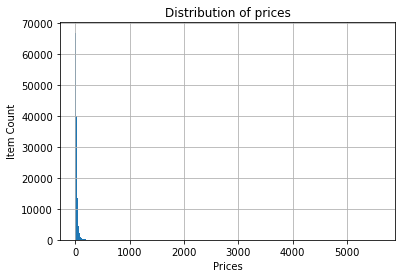

In [41]:
# Recommendation system may get skewed using price because of the non normal distribution.
grocery_data_5.price.hist(bins=300)
plt.xlabel('Prices')
plt.ylabel('Item Count')
plt.title('Distribution of prices')

In [42]:
grocery_data_5[grocery_data_5['price'] < 100].describe()

,price
count,128004.000000
mean,22.906609
std,17.128852
min,0.010000
25%,10.800000
50%,17.880000
75%,29.950000
max,99.990000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A2A2DFEB0>]],
      dtype=object)

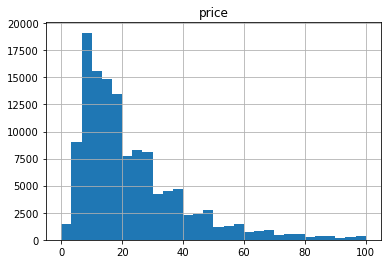

In [43]:
# May be able to narrow the price range in the future to overcome some of the issues above.
grocery_data_5[grocery_data_5['price'] < 100].hist(bins=30)

## Save Data

In [44]:
grocery_data_5.to_csv(data_out, index=True)

## Summary
- Analyzed the data several ways and added additional tasks (i.e. tests) for learning purposes.
- Originally there were 18 columns with 287,051 rows.
- Removed tech1, fit, tech2, similar_item, date, details because the rows were at least 60%+ blank/missing.
- Removed image because the image url isn't needed for this project (there isn't going to be any analysis on jpg).
- Dropped the duplicate asin rows and then set the index to them.
- For now, carrying forward the rest of the data which is:
   - 11 columns
   - Max of 283,354 rows
   - Min of 130,134 rows
- Expect that description and details will have too much info to be helpful.
- Also, unsure if having only 45% of the prices is enough.
- Features of interest are title, also_buy, also_view, and rank.
- Still need to complete the feature engineering section of the course before it's possible to analyze several of the columns.
- Therefore, the target feature is still unknown.

## Tests
These would usually be in a separate directory or file.

### Unit Tests

In [45]:
class UnitTestExamples(unittest.TestCase):
    
    def test_formatting_removed(self):
        self.assertEqual(convert_currency('$5,000.00'), 5000.00)
    
    def test_whole_number(self):
        self.assertEqual(convert_currency(5), 5)
    
    def test_rounding_floats(self):
        self.assertEqual(convert_currency(.16666666666666666666), 0.17)
    
    def test_warn_problem_character(self):
        with self.assertRaises(ValueError):
            convert_currency('€5')
        
    def test_blank_values(self):
        self.assertTrue(np.isnan(convert_currency('')))
            
    def test_problem_characters(self):
        self.assertTrue(np.isnan(convert_currency('.a-box-inner{background-color:#fff}#alohaBuyBoxWidget')))
            
    def test_range_of_values(self):
        self.assertTrue(np.isnan(convert_currency('$17.24 - $39.20')))
   

### Integration Tests
        

In [46]:
class IntegrationTestExamples(unittest.TestCase):

   def test_data_file_exists(self):
       self.assertTrue(os.path.isfile(data_in))
       
   def test_documentation_file_exists(self):
       self.assertTrue(os.path.isfile(doc_filepath))
       
   def test_file_exists_logic(self):
       self.assertFalse(os.path.isfile('Does_Not_Exist.csv'))

### Test Results

In [47]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_data_file_exists (__main__.IntegrationTestExamples) ... ok
test_documentation_file_exists (__main__.IntegrationTestExamples) ... ok
test_file_exists_logic (__main__.IntegrationTestExamples) ... ok
test_blank_values (__main__.UnitTestExamples) ... ok
test_formatting_removed (__main__.UnitTestExamples) ... ok
test_problem_characters (__main__.UnitTestExamples) ... ok
test_range_of_values (__main__.UnitTestExamples) ... ok
test_rounding_floats (__main__.UnitTestExamples) ... ok
test_warn_problem_character (__main__.UnitTestExamples) ... ok
test_whole_number (__main__.UnitTestExamples) ... ok

----------------------------------------------------------------------
Ran 10 tests in 0.008s

OK


## References
1) Jianmo Ni 2018 [Amazon Review Data (2018)](https://nijianmo.github.io/amazon/).  
2) Chris Moffitt 2018 [Overview of Pandas Data Types](https://pbpython.com/pandas_dtypes.html).  
3) Chris Moffitt 2019 [Using The Pandas Category Data Type](https://pbpython.com/pandas_dtypes_cat.html).